In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import pandas as pd

In [2]:
# Carregando dados
ltns_2017 = np.array([[897.78,2018],[812.14,2019],[754.04,2020],[651.41,2021]])
ltns_2018 = np.array([[936.03,2019],[855.85,2020],[770.38,2021],[622.14,2023]])
ltns_2019 = np.array([[937.58,2020],[866.29,2021],[804.61,2022],[719.12,2023]])

In [3]:
# Algoritmo para estrutura a termo
def term_structure(valores, ano):
    ys = np.array([(1000/i[0])**(1/(i[1]-ano)) - 1 for i in valores])
    ys *= 100
    return ys

# Estrutura a termo para cada ano
ts_2017 = [(i[1]-2017) for i in ltns_2017]
ys_2017 = term_structure(ltns_2017, 2017)

ts_2018 = [(i[1]-2018) for i in ltns_2018]
ys_2018 = term_structure(ltns_2018, 2018)

ts_2019 = [(i[1]-2019) for i in ltns_2019]
ys_2019 = term_structure(ltns_2019, 2019)

In [4]:
# Funções para plotar gráficos
def plot_spline(ts, ys, ano, lim):
    xs = np.linspace(1,lim,100)
    spl = spline(ts, ys, xs)
    plt.figure(figsize=(12,8))
    plt.title('Yield Curve - Titulos emitidos em %d' % ano)
    plt.xlabel('Tempo até maturidade (em anos)')
    plt.ylabel('Juros (%)')
    plt.grid(True)
    plt.plot(xs,spl, 'r')
    plt.plot(ts,ys, 'ro')
    plt.show()

/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  after removing the cwd from sys.path.


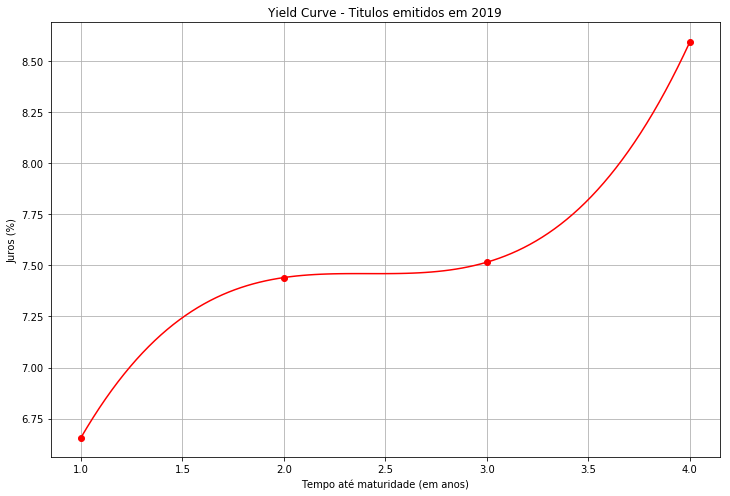

In [5]:
plot_spline(ts_2019, ys_2019, 2019,4)

/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  after removing the cwd from sys.path.


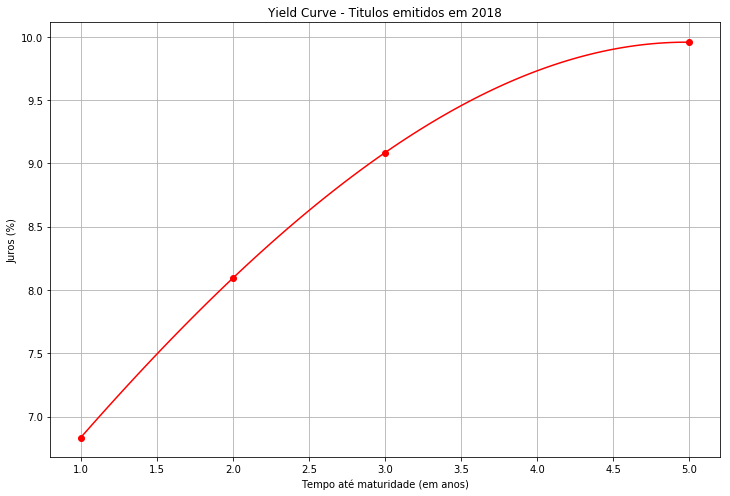

In [6]:
plot_spline(ts_2018, ys_2018, 2018, 5)

/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  after removing the cwd from sys.path.


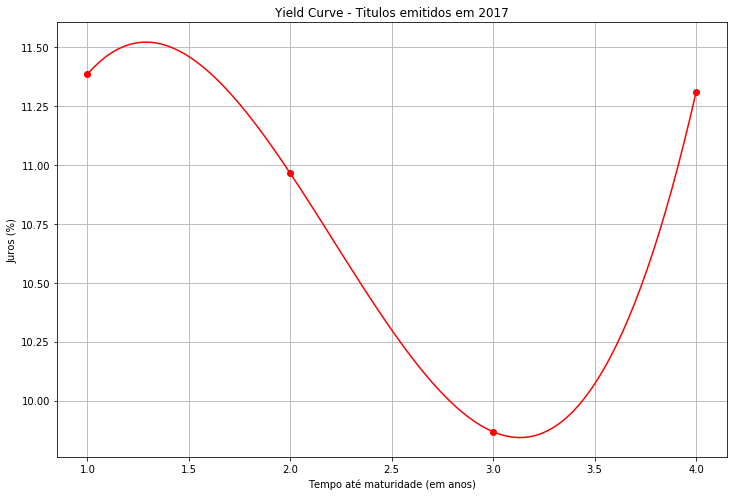

In [7]:
plot_spline(ts_2017, ys_2017, 2017, 4)

### Atividade 3

In [90]:
kroton = pd.read_csv('KROT3.csv')[::-1]
mglu = pd.read_csv('MGLU3.csv')[::-1]
itau = pd.read_csv('ITUB4.csv')[::-1]
raias = pd.read_csv('RADL3.csv')[::-1]

In [91]:
itau_fecho = itau.iloc[0:,1:2].values.flatten()
kroton_fecho = kroton.iloc[0:,1:2].values.flatten()
raias_fecho = raias.iloc[0:,1:2].values.flatten()
mglu_fecho = mglu.iloc[0:,1:2].values.flatten()

beta_itau = 1.2663
rm_itau = 0.2039

beta_mglu = 1.2737
rm_mglu = 0.2598

beta_raia = 0.3499
rm_raia = 0.1397

beta_kroton = 1.1226
rm_kroton = 0.0738

re_itau = retorno_esp(selic, beta = beta_itau, rm = rm_itau)
re_mglu = retorno_esp(selic, beta = beta_mglu, rm = rm_mglu)
re_raia = retorno_esp(selic, beta = beta_raia, rm = rm_raia)
re_kroton = retorno_esp(selic, beta = beta_kroton, rm = rm_kroton)

vol_itau = 0.513346
vol_mglu = 0.726408
vol_raia = 0.164342
vol_kroton = 0.226435

shp_itau = sharpe(vol_itau, re_itau)
shp_mglu = sharpe(vol_mglu, re_mglu)
shp_raia = sharpe(vol_raia, re_raia)
shp_kroton = sharpe(vol_kroton, re_kroton)

In [92]:
selic = 0.065
def retorno_esp(rf = selic, beta = 1, rm = 1):
    return rf + beta*(rm - rf)

def sharpe(vol, re,rf = selic):
    return (re - rf)/vol

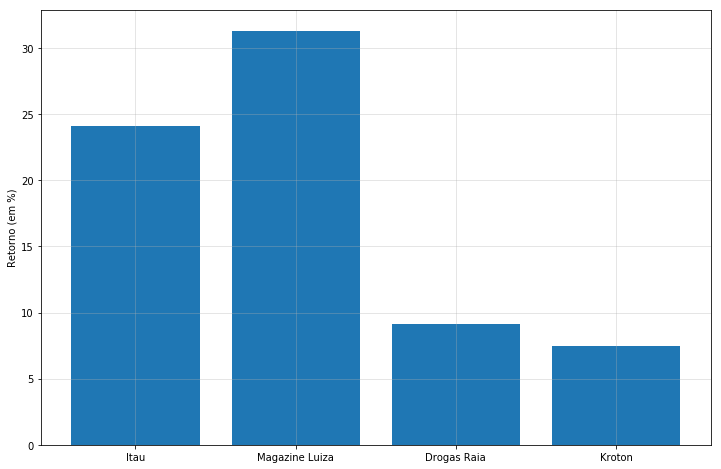

In [93]:
res = np.array([re_itau, re_mglu, re_raia, re_kroton])
plt.figure(figsize=(12,8))
plt.bar(['Itau', 'Magazine Luiza', 'Drogas Raia', 'Kroton'], res*100)
plt.ylabel('Retorno (em %)')
plt.grid(alpha = 0.4)
plt.show()

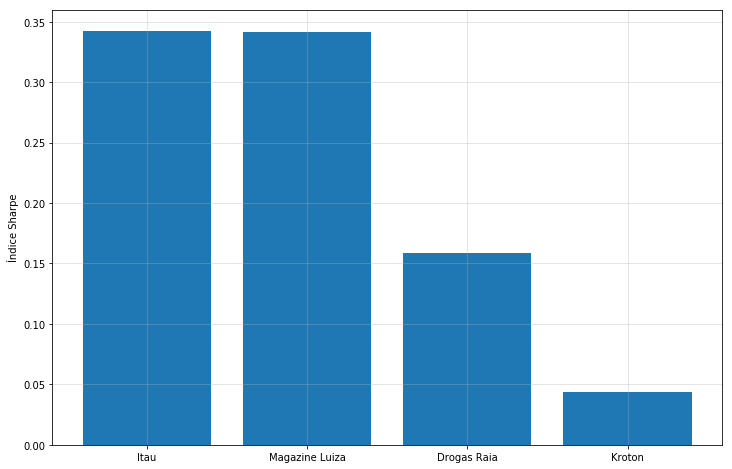

In [94]:
sharpes = [shp_itau, shp_mglu, shp_raia, shp_kroton]
plt.figure(figsize=(12,8))
plt.bar(['Itau', 'Magazine Luiza', 'Drogas Raia', 'Kroton'], sharpes)
plt.grid(alpha = 0.4)
plt.ylabel('Índice Sharpe')
plt.show()

In [64]:
shp_itau, shp_mglu

(0.342632590884121, 0.34156666776797606)